<a href="https://colab.research.google.com/github/Roya62/sentiment-analysis/blob/main/Twitter_sentiment_analysis_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install required libraries

!pip install tensorflow-text
!pip install tf-models-official
!pip install nltk
!pip install string-grouper

     |████████████████████████████████| 4.4 MB 4.2 MB/s 
     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 211 kB 25.3 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 36.7 MB/s 
     |████████████████████████████████| 37.1 MB 46 kB/s 
     |████████████████████████████████| 99 kB 8.9 MB/s 
     |████████████████████████████████| 90 kB 9.1 MB/s 
     |████████████████████████████████| 1.1 MB 46.4 MB/s 
     |████████████████████████████████| 636 kB 31.4 MB/s 
     |████████████████████████████████| 352 kB 52.8 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=a46a80bd68fc038349df22758091163b04c360adeef608cfc9bba094418c3680
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=821592f6dcbe02ccba4

In [2]:
import string
import nltk
import re

nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('english')

class text_cleaner:
  def remove_emoji(self, text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
    
  def remove_punctuation(self, text):
    new_text = ''
    for char in text:
      if char in string.punctuation:
        new_text += ' '
      else:
        new_text += char

    return new_text

  def lowering(self, text):
    return text.lower()

  def remove_stopwords(self, text):
    text = text.split()
    text = ''.join([i + ' ' for i in text if i not in stopwords]).strip()
    return text

  def clean(self, text):
    text = self.remove_punctuation(text)
    text = self.lowering(text)
    text = self.remove_emoji(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
%cd /content/drive/MyDrive
import pandas as pd

data = pd.read_csv('/content/Bigtech  twitter sentiment.csv')[['text','polarity']]
data = data.drop_duplicates()
data = data.dropna().reset_index(drop = True)
data.columns = ['text','sentiment']

[Errno 2] No such file or directory: '/content/drive/MyDrive'
/content


In [4]:
data['sentiment'] = data['sentiment'].apply(lambda a:1 if a>0.8 else -1 if a<-0.8 else a)

data = data[(data.sentiment==0) | (data.sentiment==1) | (data.sentiment==-1)]
data = data.reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    98225
 1.0    17646
-1.0     2692
Name: sentiment, dtype: int64

In [5]:
data.head(20)

,text,sentiment
0,"#BullSequana X2415, the first #supercomputer b...",0.0
1,#NVIDIA delays launch of #GeForce RTX 3070 unt...,0.0
2,"#BullSequana X2415, the first #supercomputer b...",0.0
3,"#BullSequana X2415, the first #supercomputer b...",0.0
4,"#BullSequana X2415, the first #supercomputer b...",0.0
5,"#BullSequana X2415, the first #supercomputer b...",0.0
6,📸 #PhotoModeMonday MAN'S ROAD ☁️ 🎵 https://t...,0.0
7,Hardware Utilization of VividSparks Products. ...,0.0
8,Hello everyone! I am excited to announce that ...,1.0
9,"#BullSequana X2415, the first #supercomputer b...",0.0


In [6]:
cleaner = text_cleaner()
data['text'] = data['text'].apply(lambda a:cleaner.clean(a))
data = data.drop_duplicates().reset_index(drop = True)

In [7]:
data.head(20)

,text,sentiment
0,bullsequana x2415 the first supercomputer b...,0.0
1,nvidia delays launch of geforce rtx 3070 unt...,0.0
2,bullsequana x2415 the first supercomputer b...,0.0
3,bullsequana x2415 the first supercomputer b...,0.0
4,bullsequana x2415 the first supercomputer b...,0.0
5,bullsequana x2415 the first supercomputer b...,0.0
6,photomodemonday man s road ☁️ https t c...,0.0
7,hardware utilization of vividsparks products ...,0.0
8,hello everyone i am excited to announce that ...,1.0
9,bullsequana x2415 the first supercomputer b...,0.0


In [8]:
from string_grouper import group_similar_strings

data2 = pd.Series()

for i in range(5):
  data3 = group_similar_strings(data.iloc[20000*i:(i+1)*20000]['text'],ignore_index=True, min_similarity=0.8)
  data2 = data2.append(data3, ignore_index = True)

data3 = group_similar_strings(data.iloc[100000:]['text'],ignore_index=True, min_similarity=0.8)
data2 = data2.append(data3, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data['text'] = data2
data = data.drop_duplicates(subset = 'text').reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    90831
 1.0    15929
-1.0     2546
Name: sentiment, dtype: int64

In [10]:
data_0 = data[data.sentiment == 0].sample(n = 2546)
data_1 = data[data.sentiment == 1].sample(n = 2546)
data_2 = data[data.sentiment == -1].sample(n = 2546)

data = data_0.append(data_1, ignore_index = True)
data = data.append(data_2, ignore_index = True)

data = data.sample(frac=1).reset_index(drop = True)

In [11]:
import numpy as np

X = data['text'].values
y = data['sentiment'].values

new_y = []
for value in y:
  if value == -1:
    new_y.append([1,0,0])
  elif value== 0:
    new_y.append([0,1,0])
  else:
    new_y.append([0,0,1])

y = np.array(new_y)

In [12]:
import os

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

tf.get_logger().setLevel('ERROR')

In [13]:
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1", trainable = True)

In [14]:
# Model definition

def build_classifier_model():
  # Input layer 
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

  # Tokenizer layer 
  encoder_inputs = bert_preprocess_model(text_input)

  # Pretrained bert layer
  outputs = bert_model(encoder_inputs)

  # Get pooled output of bert
  net = outputs['pooled_output']
  
  # Dense layer
  net = tf.keras.layers.Dense(128, activation='relu', name='hidden')(net)

  # Dropout layer
  net = tf.keras.layers.Dropout(0.3)(net)

  # Classification layer
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [15]:
import random

inds = list(range(len(X)))
random.shuffle(inds)

val_size = 0.2
test_size = 0.15

val_inds = inds[:int(val_size * len(inds))]
test_inds = inds[int(val_size * len(inds)):int(val_size * len(inds)) + int(test_size * len(inds))]

not_train = test_inds + val_inds

set_not_train = set(not_train)
set_inds = set(inds)
set_train = set_inds.difference(set_not_train)

train_inds = list(set_train)

X_train = X[train_inds]
y_train = y[train_inds]

X_val = X[val_inds]
y_val = y[val_inds]

X_test = X[test_inds]
y_test = y[test_inds]

In [16]:
from sklearn.metrics import classification_report
tf.keras.backend.clear_session()

checkpoint_path = "model.ckpt"

results = []
classification_reports = []
train_hists = []
predicts = []
ys = []


cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor = 'val_loss',
                                                verbose=0)

es_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0, patience=2, verbose=0,
  mode='min', baseline=None, restore_best_weights=False)

classifier_model = build_classifier_model()
classifier_model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


train_hist = classifier_model.fit(x = X_train,y=y_train,validation_data=(X_val, y_val),
                              epochs=400,batch_size = 32, callbacks = [cp_callback, es_callback])


predicted = classifier_model.predict(X_test)
predicted = np.array(list(map(lambda a:[0 if i!=np.argmax(a) else 1 for i in range(3)], predicted)))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
156/156 [==============================] - 76s 431ms/step - loss: 0.3414 - accuracy: 0.8667 - val_loss: 0.1721 - val_accuracy: 0.9456
Epoch 2/400
156/156 [==============================] - 65s 418ms/step - loss: 0.0865 - accuracy: 0.9746 - val_loss: 0.1581 - val_accuracy: 0.9496
Epoch 3/400
156/156 [==============================] - 66s 422ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.2007 - val_accuracy: 0.9542
Epoch 4/400
156/156 [==============================] - 65s 419ms/step - loss: 0.0292 - accuracy: 0.9928 - val_loss: 0.2435 - val_accuracy: 0.9515


In [17]:
classifier_model.load_weights(checkpoint_path)
hist = classifier_model.evaluate(X_test, y_test)

print(f"\nTest loss: {round(hist[0], 2)}")
print(f"Test acc: {round(hist[1]*100, 2)}%")

36/36 [==============================] - 6s 172ms/step - loss: 0.1647 - accuracy: 0.9520

Test loss: 0.16
Test acc: 95.2%


Comfusion matrix:




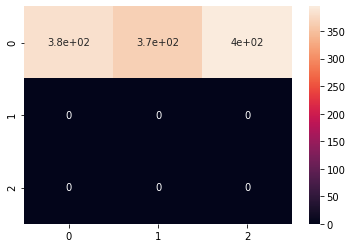

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

print("Comfusion matrix:")
print('\n')
predicted = [np.argmax(i) for i in predicted]
y = [np.argmax(i) for i in y_test]

df_cm = pd.DataFrame(confusion_matrix(predicted, y), index = [i for i in "012"],
columns = [i for i in "012"])
ax = plt.axes()
sn.heatmap(df_cm, annot=True, ax=ax)
plt.show()


In [20]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50       383
           1       0.00      0.00      0.00       367
           2       0.00      0.00      0.00       395

    accuracy                           0.33      1145
   macro avg       0.11      0.33      0.17      1145
weighted avg       0.11      0.33      0.17      1145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


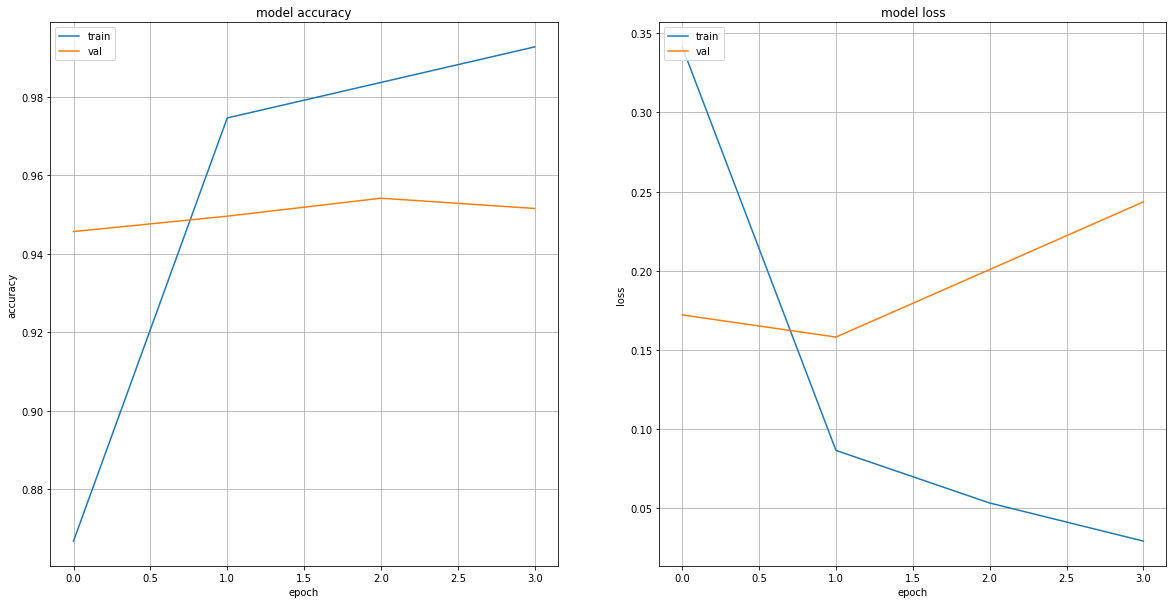

In [21]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.plot(train_hist.history['accuracy'])
ax1.plot(train_hist.history['val_accuracy'])
ax1.set_title(f'model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid()

ax2.plot(train_hist.history['loss'])
ax2.plot(train_hist.history['val_loss'])
ax2.set_title(f'model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid()
fig.show()